# EQUITY VANILLA OPTION USING MONTE CARLO

Valuation and Risk of a simple Vanilla Equity Option

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from financepy.utils import *
from financepy.products.equity import *

# Define the Call and Put Options

In [20]:
value_date = Date(1, 1, 2015)

In [21]:
expiry_date = value_date.add_years(0.5)

In [22]:
expiry_date

01-JUL-2015

In [23]:
strike_price = 50.0

In [24]:
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)

In [25]:
stock_price = 50
volatility = 0.20
interest_rate = 0.05
dividend_yield = 0.0

In [26]:
discount_curve = DiscountCurveFlat(value_date, interest_rate)

In [27]:
dividend_curve = DiscountCurveFlat(value_date, dividend_yield)

In [28]:
model = BlackScholes(volatility)

In [29]:
v_exact = call_option.value(value_date, stock_price, discount_curve, dividend_curve, model)
print(v_exact)

3.4276581469416914


In [30]:
seed = 141

In [31]:
v_mc = []
v_exacts = []

num_paths = range(10000,1000000,10000)
for numPath in num_paths:
    v = call_option.value_mc(value_date, stock_price, discount_curve, dividend_curve, model, numPath, seed)
    v_mc.append(v)
    v_exacts.append(v_exact)

Text(0, 0.5, 'Option Price')

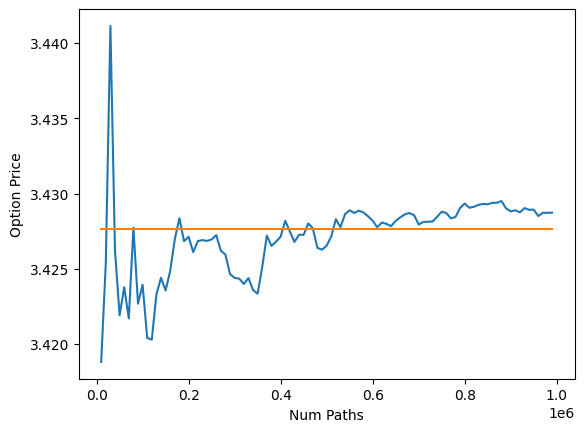

In [32]:
plt.plot(num_paths, v_mc)
plt.plot(num_paths, v_exacts)

plt.xlabel("Num Paths")
plt.ylabel("Option Price")

## Using Sobol Quasi-Random Numbers

In [33]:
v_mc = []
v_exacts = []

num_paths = range(100000,1000000,10000)
for numPath in num_paths:
    v = call_option.value_mc(value_date, stock_price, discount_curve, dividend_curve, model, numPath, seed, True)
    v_mc.append(v)
    v_exacts.append(v_exact)

Text(0, 0.5, 'Option Price')

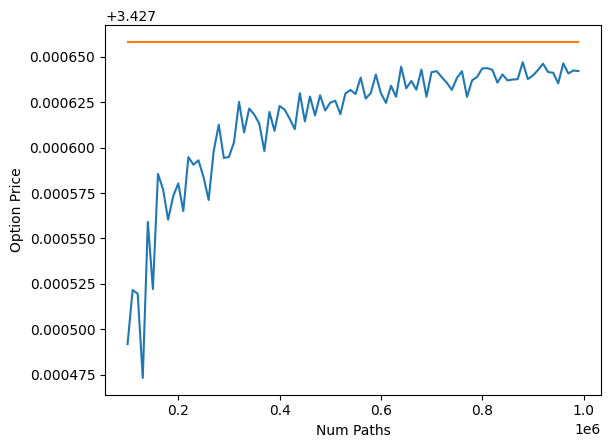

In [34]:
plt.plot(num_paths, v_mc)
plt.plot(num_paths, v_exacts)

plt.xlabel("Num Paths")
plt.ylabel("Option Price")

The convergence is impressive !

Copyright (c) 2020 Dominic O'Kane